## Loading labelled dataset


In [2]:
from sagemaker import get_execution_role #this contains the permissions to access the bucket
import boto3 #aws python client
import pandas as pd
s3 = boto3.client('s3') #connect to S3
bucketName = "cs539-e2023-149b5d57-81a4-4e31-a476-c81e7e07dc33"

In [3]:
response = s3.get_object(Bucket=bucketName, Key='datasets/csv/review_FAKE.csv')
df = pd.read_csv(response.get("Body"))

In [4]:
df.describe()
# df['flagged'].unique()

,rating,usefulCount,coolCount,funnyCount
count,788471.000000,788471.000000,788471.000000,788471.000000
mean,3.733021,1.574145,1.029895,0.870239
std,1.138435,2.773069,2.264558,2.287451
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,208.000000,170.000000,191.000000


## Creating dataframe with only fake reviews and real reviews

In [5]:
fake_reviews = df.loc[df['flagged'] == 'Y']
real_reviews = df.loc[df['flagged'] == 'N']

print("Fake reviews size:", fake_reviews['rating'].size)
print("Real reviews size:", real_reviews['rating'].size)

Fake reviews size: 8303
Real reviews size: 58716


## Creating bar chart to count number of reviews for each rating (real and fake)



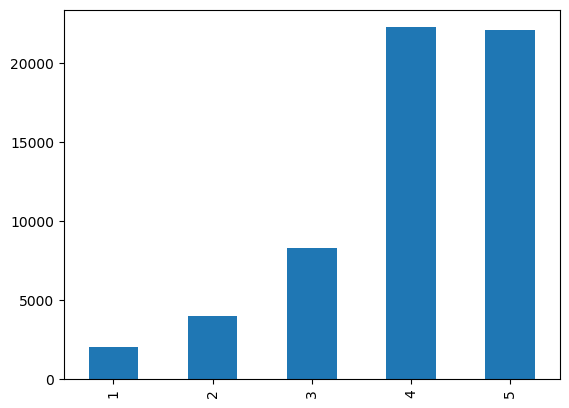

In [11]:
%matplotlib inline
#real
real_ratings = real_reviews['rating']
real_ratings.value_counts().sort_index().plot.bar()

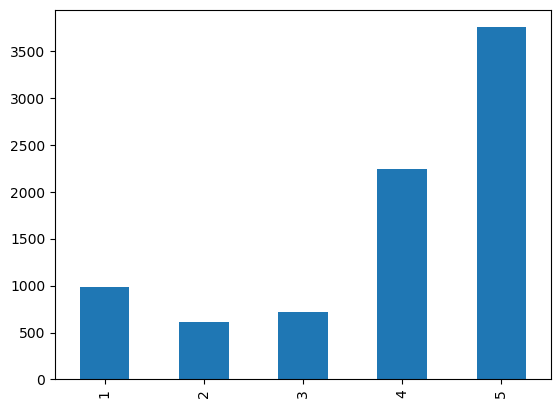

In [12]:
#fake
fake_ratings = fake_reviews['rating']
fake_ratings.value_counts().sort_index().plot.bar()

## Download nltk and needed packages to tokenize words in review content

In [6]:
import nltk
# nltk.download()
from nltk.tokenize import word_tokenize

In [109]:
# checked for NaN values, replacing with empty str if any
# real_reviews["reviewContent"].isna().sum()
# real_reviews["reviewContent"].fillna('', inplace=True)

0

In [8]:
fake_reviews.dtypes
# checked for NaN values, replacing with empty str
# fake_reviews["reviewContent"].isna().sum()
fake_reviews["reviewContent"].fillna('', inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
real_reviews["reviewContent"]

0         Unlike Next, which we'd eaten at the previous ...
1         Probably one of the best meals I've had ever. ...
2         Service was impeccable. Experience and present...
3         The problem with places like this, given the e...
4         I have no idea how to write my review - dining...
                                ...                        
497204    I've passed this place a bunch of times on my ...
501512    Rubino's is not really setup as a retail opera...
504898    This place is amazing.  The food is great and ...
506036    OK went back the next day as I was driving by ...
506191    Delicious, rather authentic Mexican food, must...
Name: reviewContent, Length: 58716, dtype: object

In [17]:
fake_reviews["reviewContent"]

58589    The food is amazing.  I have two tickets for t...
58590    I did not know what to expect from this restau...
58591    I liked the services offered by (Alinea) resta...
58592    I liked the services offered by (Alinea) resta...
58593    Presumably one of the best restaurants in Amer...
                               ...                        
66887    I've been back twice since my first post and e...
66888    A good dining experience soured by a "mistake"...
66889    Great food and good service. It's BYOB, so bri...
66890    This is a must dine restaurant. After we saw t...
66891    I came here about 5 times and the food is alwa...
Name: reviewContent, Length: 8303, dtype: object

In [ ]:
real_reviews['wordTokenized'] = real_reviews["reviewContent"].apply(word_tokenize)
real_reviews['wordCount'] = real_reviews['wordTokenized'].str.len()

fake_reviews['wordTokenized'] = fake_reviews["reviewContent"].apply(word_tokenize)
fake_reviews['wordCount'] = fake_reviews['wordTokenized'].str.len()

In [116]:
real_reviews

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,wordTokenized,wordCount
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,N,pbEiXam9YJL3neCYHGwLUA,"[Unlike, Next, ,, which, we, 'd, eaten, at, th...",1002
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,N,pbEiXam9YJL3neCYHGwLUA,"[Probably, one, of, the, best, meals, I, 've, ...",75
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,N,pbEiXam9YJL3neCYHGwLUA,"[Service, was, impeccable, ., Experience, and,...",54
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,N,pbEiXam9YJL3neCYHGwLUA,"[The, problem, with, places, like, this, ,, gi...",435
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,N,pbEiXam9YJL3neCYHGwLUA,"[I, have, no, idea, how, to, write, my, review...",196
...,...,...,...,...,...,...,...,...,...,...,...,...
497204,4/7/2012,I6pazvTPUqRtU,fUXNHG4x1AN9oPpBSpCtUw,I've passed this place a bunch of times on my ...,5,0,0,1,N,_KI0Y2UO68kJuTFUKucaXQ,"[I, 've, passed, this, place, a, bunch, of, ti...",86
501512,6/5/2009,gu7FbL,QQCm2oqSnnz24Z-yHeMtxQ,Rubino's is not really setup as a retail opera...,4,1,1,0,N,_KI0Y2UO68kJuTFUKucaXQ,"[Rubino, 's, is, not, really, setup, as, a, re...",63
504898,5/6/2012,hLwn6zw,OXRKydSyzC35n2fNUnbopg,This place is amazing. The food is great and ...,5,0,0,0,N,XvP-kanjF6SpchosRk0N5g,"[This, place, is, amazing, ., The, food, is, g...",40
506036,Updated - 1/8/2011,KEkOzeO9YJ,NE8ULc362aFvnkTDgvZbcA,OK went back the next day as I was driving by ...,2,2,1,0,N,XvP-kanjF6SpchosRk0N5g,"[OK, went, back, the, next, day, as, I, was, d...",124


In [117]:
fake_reviews

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,wordTokenized,wordCount
58589,8/25/2012,XgqV3Ac0CLg2R-_c-yZvTw,tfn2U8XfLaJnRD9EXpTxLQ,The food is amazing. I have two tickets for t...,5,0,0,0,Y,pbEiXam9YJL3neCYHGwLUA,"[The, food, is, amazing, ., I, have, two, tick...",46
58590,8/22/2012,T45v0q1_dbYkDMAJCwoFwg,GHoG4X4FY8D8L563zzPX5w,I did not know what to expect from this restau...,5,0,0,0,Y,pbEiXam9YJL3neCYHGwLUA,"[I, did, not, know, what, to, expect, from, th...",851
58591,8/9/2012,YPEHZA4pSQFhNDgvg8RAMg,0bjwIPaxbJDDwZXoVcPNqg,I liked the services offered by (Alinea) resta...,3,0,0,0,Y,pbEiXam9YJL3neCYHGwLUA,"[I, liked, the, services, offered, by, (, Alin...",28
58592,8/8/2012,ZfpyS5xz5FQbdijiOi2xzg,D0BzL4qUp3PtGAO12eAExg,I liked the services offered by (Alinea) resta...,4,0,0,0,Y,pbEiXam9YJL3neCYHGwLUA,"[I, liked, the, services, offered, by, (, Alin...",28
58593,8/3/2012,mIzc61fH3bpNkxDzO7nX0w,_JFcE8DVCsCq-A6C727GnA,Presumably one of the best restaurants in Amer...,5,0,0,0,Y,pbEiXam9YJL3neCYHGwLUA,"[Presumably, one, of, the, best, restaurants, ...",115
...,...,...,...,...,...,...,...,...,...,...,...,...
66887,\n3/2/2012,Hr0bENBZzznWhYGKSSEEJA,i2Th0Zskb4Ry_aVZQMIR_Q,I've been back twice since my first post and e...,5,0,0,0,Y,mCHto10PBQOKnefm7gholg,"[I, 've, been, back, twice, since, my, first, ...",146
66888,2/18/2012,qGvPCsS3krxl5O5fo9Qasw,UqTtumV5SGzzW2gtJc-fNg,"A good dining experience soured by a ""mistake""...",1,0,0,0,Y,mCHto10PBQOKnefm7gholg,"[A, good, dining, experience, soured, by, a, `...",203
66889,12/31/2011,znZdvMF_Q-rCT3ih3-AQAg,Y-yZy5TWmWrC6mlY_BaseQ,"Great food and good service. It's BYOB, so bri...",5,0,0,0,Y,mCHto10PBQOKnefm7gholg,"[Great, food, and, good, service, ., It, 's, B...",38
66890,12/17/2011,tgbjSaEGOGyV6q1y13Mi8Q,Yva1UlQvZ-MGfJEQMWrk8Q,This is a must dine restaurant. After we saw t...,5,0,0,0,Y,mCHto10PBQOKnefm7gholg,"[This, is, a, must, dine, restaurant, ., After...",68


In [114]:
real_reviews['wordCount'].describe()

count    58716.000000
mean       167.962004
std        140.869338
min          1.000000
25%         73.000000
50%        130.000000
75%        221.000000
max       1351.000000
Name: wordCount, dtype: float64

In [115]:
fake_reviews['wordCount'].describe()

count    8303.000000
mean      113.714922
std       112.431127
min         1.000000
25%        42.000000
50%        80.000000
75%       143.000000
max      1087.000000
Name: wordCount, dtype: float64